Problem 1: Single-Feature Linear Regression using Gradient Descent



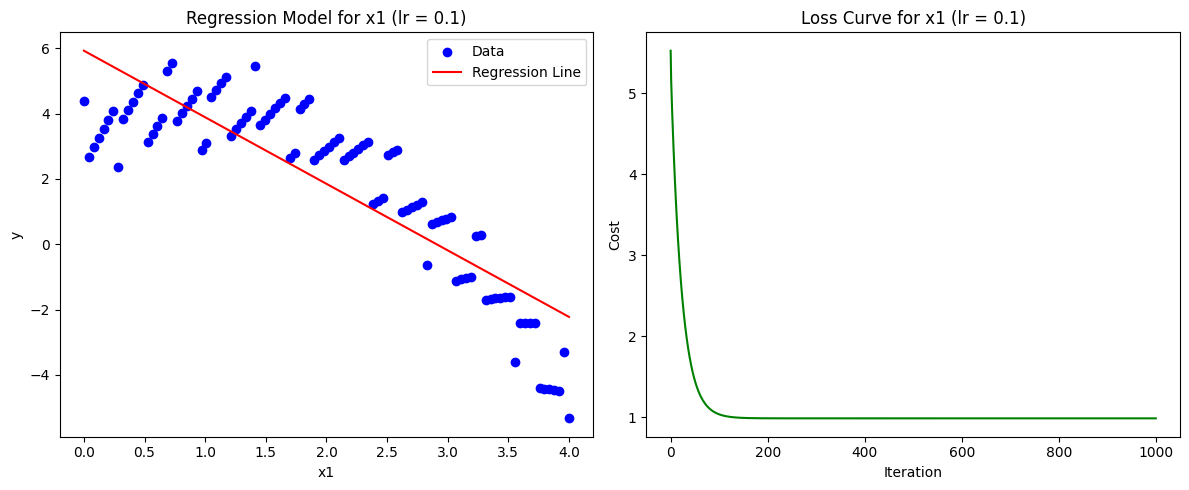

For x1: y = 5.9279 + -2.0383 * x1 with final cost = 0.9850 (lr = 0.1)


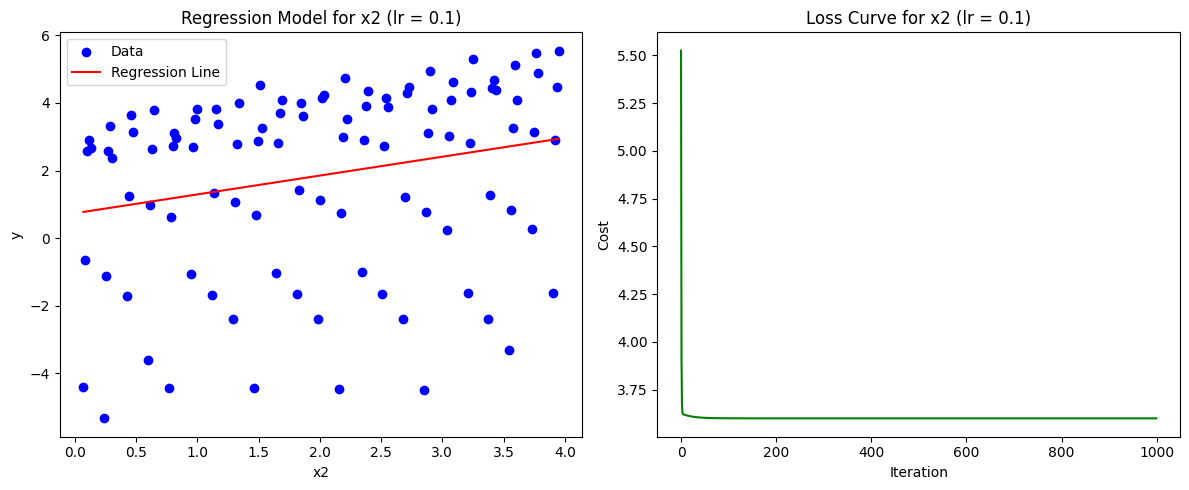

For x2: y = 0.7361 + 0.5576 * x2 with final cost = 3.5994 (lr = 0.1)


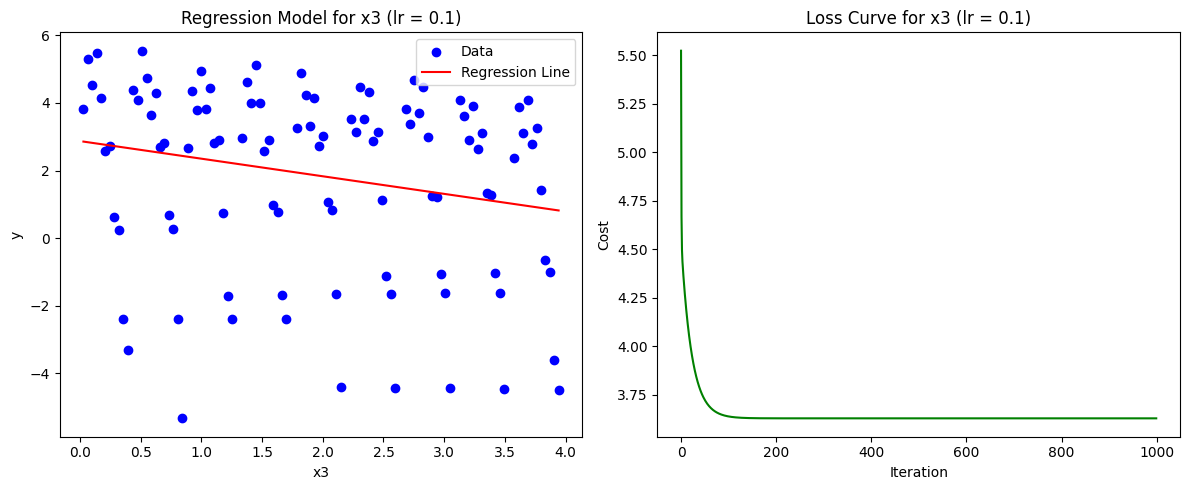

For x3: y = 2.8714 + -0.5205 * x3 with final cost = 3.6295 (lr = 0.1)

Problem 2: Multi-Feature Linear Regression using Gradient Descent

Final multi-feature model: y = 5.3139 + -2.0037*x1 + 0.5326*x2 + -0.2656*x3
(Learning rate: 0.1, Final cost: 0.7385)


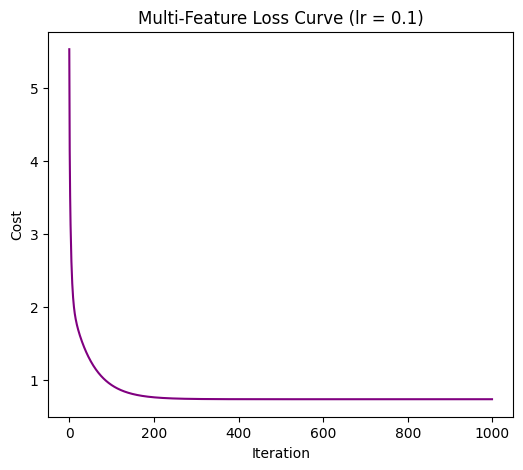


Predictions for new (x1, x2, x3) values:
Input [1 1 1] -> Predicted y = 3.5773
Input [2 0 4] -> Predicted y = 0.2443
Input [3 2 1] -> Predicted y = 0.1025


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset from D3.csv
data = pd.read_csv('D3.csv')
x1 = data.iloc[:, 0].values
x2 = data.iloc[:, 1].values
x3 = data.iloc[:, 2].values
y  = data.iloc[:, 3].values

# -------------------------
# Gradient Descent for Single Feature Linear Regression
# -------------------------
def gradient_descent_single(x, y, lr=0.1, iterations=1000):
    m = len(y)
    theta0, theta1 = 0.0, 0.0  # Initialize parameters to zero
    loss_history = []

    for i in range(iterations):
        # Prediction using current parameters
        predictions = theta0 + theta1 * x
        error = predictions - y
        cost = (1/(2*m)) * np.sum(error ** 2)
        loss_history.append(cost)
        
        # Compute gradients
        grad0 = (1/m) * np.sum(error)
        grad1 = (1/m) * np.sum(error * x)
        
        # Update parameters
        theta0 = theta0 - lr * grad0
        theta1 = theta1 - lr * grad1
        
    return theta0, theta1, loss_history

# -------------------------
# Gradient Descent for Multi-Feature Linear Regression
# -------------------------
def gradient_descent_multi(X, y, lr=0.1, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)  # Initialize parameters (including bias) to zero
    loss_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        error = predictions - y
        cost = (1/(2*m)) * np.sum(error ** 2)
        loss_history.append(cost)
        
        # Gradient calculation for all parameters
        gradient = (1/m) * (X.T.dot(error))
        theta = theta - lr * gradient
        
    return theta, loss_history

# Define learning rates to test
learning_rates = [0.1, 0.05, 0.01]
iterations = 1000

# -------------------------
# Problem 1: Single-Feature Models
# -------------------------
print("Problem 1: Single-Feature Linear Regression using Gradient Descent\n")
features = [(x1, 'x1'), (x2, 'x2'), (x3, 'x3')]
models = {}

for feature, name in features:
    best_theta0, best_theta1 = None, None
    best_loss = float('inf')
    best_lr = None
    best_loss_history = None
    
    # Try each learning rate and keep the one with the lowest final cost
    for lr in learning_rates:
        theta0, theta1, loss_history = gradient_descent_single(feature, y, lr=lr, iterations=iterations)
        if loss_history[-1] < best_loss:
            best_loss = loss_history[-1]
            best_theta0 = theta0
            best_theta1 = theta1
            best_lr = lr
            best_loss_history = loss_history
            
    models[name] = {
        'theta0': best_theta0,
        'theta1': best_theta1,
        'lr': best_lr,
        'loss_history': best_loss_history
    }
    
    # Plot the regression line and data
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(feature, y, color='blue', label='Data')
    x_line = np.linspace(feature.min(), feature.max(), 100)
    y_line = best_theta0 + best_theta1 * x_line
    plt.plot(x_line, y_line, color='red', label='Regression Line')
    plt.xlabel(name)
    plt.ylabel('y')
    plt.title(f'Regression Model for {name} (lr = {best_lr})')
    plt.legend()
    
    # Plot the loss curve
    plt.subplot(1, 2, 2)
    plt.plot(best_loss_history, color='green')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title(f'Loss Curve for {name} (lr = {best_lr})')
    plt.tight_layout()
    plt.show()
    
    print(f"For {name}: y = {best_theta0:.4f} + {best_theta1:.4f} * {name} with final cost = {best_loss:.4f} (lr = {best_lr})")

# -------------------------
# Problem 2: Multi-Feature Model
# -------------------------
print("\nProblem 2: Multi-Feature Linear Regression using Gradient Descent\n")

# Create the design matrix for multi-feature regression (with bias)
X_multi = np.column_stack((np.ones(len(x1)), x1, x2, x3))

best_theta = None
best_loss = float('inf')
best_lr = None
best_loss_history = None

for lr in learning_rates:
    theta, loss_history = gradient_descent_multi(X_multi, y, lr=lr, iterations=iterations)
    if loss_history[-1] < best_loss:
        best_loss = loss_history[-1]
        best_theta = theta
        best_lr = lr
        best_loss_history = loss_history

print(f"Final multi-feature model: y = {best_theta[0]:.4f} + {best_theta[1]:.4f}*x1 + {best_theta[2]:.4f}*x2 + {best_theta[3]:.4f}*x3")
print(f"(Learning rate: {best_lr}, Final cost: {best_loss:.4f})")

# Plot the loss curve for the multi-feature model
plt.figure(figsize=(6, 5))
plt.plot(best_loss_history, color='purple')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title(f'Multi-Feature Loss Curve (lr = {best_lr})')
plt.show()

# -------------------------
# Predictions for new input values
# -------------------------
new_inputs = np.array([[1, 1, 1],
                       [2, 0, 4],
                       [3, 2, 1]])
# Add bias column to new inputs
new_inputs_bias = np.column_stack((np.ones(len(new_inputs)), new_inputs))
predictions = new_inputs_bias.dot(best_theta)

print("\nPredictions for new (x1, x2, x3) values:")
for inp, pred in zip(new_inputs, predictions):
    print(f"Input {inp} -> Predicted y = {pred:.4f}")
